In [1]:
"""
Потренируем навыки, полученные на практическом занятии. 
Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, 
и попытайтесь обучить линейную модель наиболее качественно. 
Переменная, которую надо предсказать - ’MEDV’.
"""

from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

data=load_boston()
print(load_boston()['DESCR'])            # Читаем информацию о содержимом датасета

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
data['data']
data['target']
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['MEDV'] = data['target']
df.head()                          
                                   # CRIM - уровень преступности на душу населения 
                                   # ZN - доля жилой земли, зонированной для участков площадью более 25 000 кв. футов
                                   # INDUS - Доля акров нетоварного бизнеса в городе
                                   # CHAS - Фиктивная переменная реки Чарльз: 
                                      # (= 1, если тракт ограничивает реку; 0 в противном случае)
                                   # NOX - Концентрация оксида азота (частей на 10 миллионов)
                                   # RM - среднее количество комнат в доме 
                                   # AGE - Доля единиц, занятых владельцами, построенных до 1940 года
                                   # DIS - Взвешенные расстояния до пяти бостонских центров занятости
                                   # RAD - Индекс доступности радиальных магистралей
                                   # TAX - Ставка налога на недвижимость в размере полной стоимости за 10 000 долларов США
                                   # PTRATIO - Соотношение учащихся и учителей по городу
                                   # B - 1000(Bk — 0,63)2, где Bk-доля [людей афроамериканского происхождения] по городу
                                   # LSTAT - процент населения более низкого социального статуса
                                   # MEDV - Средняя стоимость домов, занятых владельцами, в 1000 долларов США

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# изучим базовые характеристики датасета 
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
# взаимосвязь между количеством комнат и стоимостью домов
df[['RM', 'MEDV']].corr()

,RM,MEDV
RM,1.00000,0.69536
MEDV,0.69536,1.00000


In [6]:
# взаимосвязь между уровнем преступности и ценой жилья слабая и отрицательная: 
# чем выше преступность в окрУге, тем ниже стоимость дома 

df[['CRIM', 'MEDV']].corr()

,CRIM,MEDV
CRIM,1.000000,-0.388305
MEDV,-0.388305,1.000000


In [7]:
correlation_matrix = df.corr().round(4)
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.0000,-0.2005,0.4066,-0.0559,0.4210,-0.2192,0.3527,-0.3797,0.6255,0.5828,0.2899,-0.3851,0.4556,-0.3883
ZN,-0.2005,1.0000,-0.5338,-0.0427,-0.5166,0.3120,-0.5695,0.6644,-0.3119,-0.3146,-0.3917,0.1755,-0.4130,0.3604
INDUS,0.4066,-0.5338,1.0000,0.0629,0.7637,-0.3917,0.6448,-0.7080,0.5951,0.7208,0.3832,-0.3570,0.6038,-0.4837
CHAS,-0.0559,-0.0427,0.0629,1.0000,0.0912,0.0913,0.0865,-0.0992,-0.0074,-0.0356,-0.1215,0.0488,-0.0539,0.1753
NOX,0.4210,-0.5166,0.7637,0.0912,1.0000,-0.3022,0.7315,-0.7692,0.6114,0.6680,0.1889,-0.3801,0.5909,-0.4273
RM,-0.2192,0.3120,-0.3917,0.0913,-0.3022,1.0000,-0.2403,0.2052,-0.2098,-0.2920,-0.3555,0.1281,-0.6138,0.6954
AGE,0.3527,-0.5695,0.6448,0.0865,0.7315,-0.2403,1.0000,-0.7479,0.4560,0.5065,0.2615,-0.2735,0.6023,-0.3770
DIS,-0.3797,0.6644,-0.7080,-0.0992,-0.7692,0.2052,-0.7479,1.0000,-0.4946,-0.5344,-0.2325,0.2915,-0.4970,0.2499
RAD,0.6255,-0.3119,0.5951,-0.0074,0.6114,-0.2098,0.4560,-0.4946,1.0000,0.9102,0.4647,-0.4444,0.4887,-0.3816
TAX,0.5828,-0.3146,0.7208,-0.0356,0.6680,-0.2920,0.5065,-0.5344,0.9102,1.0000,0.4609,-0.4418,0.5440,-0.4685


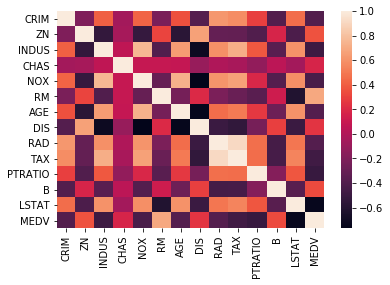

In [8]:
sns.heatmap(data=correlation_matrix)

In [10]:
# На наш взгляд, изучив базовую статистику колонок, показатель преступности имеет аномальные колебания. 
# Исключим из него выбросы и посмотрим, скольк существенно они влияют на данные столца 
# Используем квантили 

q1_1 = df['CRIM'].quantile(0.25)
q3_1 = df['CRIM'].quantile(0.75)
iqr_1 = q3_1 - q1_1
lower_bound = q1_1 - (1.5 * iqr_1) 
upper_bound = q3_1 + (1.5 * iqr_1)
remove_outliers = df[df['CRIM'].between(lower_bound, upper_bound, inclusive=True)]

# Чтобы выяснить, насколько средний показатель столбца, включающего все данные вместе с выбросами,
# отличается от среднего без выброса, 
# рассчитаем между ними разницу (все данные минус данные без выбросов): 

diff_1 = df['CRIM'].mean() - remove_outliers['CRIM'].mean()
print(diff_1)

# Разница составляет 2,415 - влияние выбросов велико. В дальнейшем исключим их из анализа по данной колонке 

2.4151825573122543


In [11]:
X = remove_outliers.iloc[:, 0:13]
y = remove_outliers[['MEDV']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [29]:
# заполним нулевые значения столбца TAX средним значение по колонке 

fill_tax = remove_outliers['TAX'].fillna(remove_outliers['TAX'].mean(), inplace=True)  

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
print(model.coef_)
print(model.intercept_)

[[ 1.44570395e-01  3.87935725e-02  3.96217872e-02  2.73301080e+00
  -9.74898617e+00  5.56417812e+00 -2.10273454e-02 -1.27369510e+00
   1.81766770e-01 -9.61914590e-03 -8.15410510e-01  1.68217773e-02
  -4.53274433e-01]]
[15.24329006]


In [32]:
y_pred = model.predict(X_test)

In [33]:
model.score(X_test, y_test)

0.7219662854637544

In [21]:
print(X_test.shape)
print(y_pred.shape)
print(y_test.shape)

(132, 13)
(132, 1)
(132, 1)


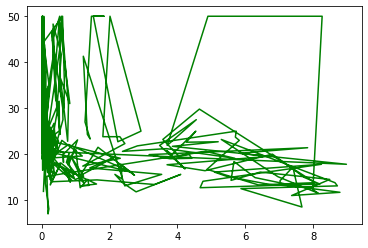

In [27]:
plt.plot(X['CRIM'],y, c='g')